**Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).**

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [10]:
# Define X and Y
X, y = mnist['data'], mnist['target']

In [11]:
# See data
import numpy as np
some_digit = X[np.random.randint(0, (y.shape[0]))]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  60., 190., 134.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  10., 142., 249., 254., 206.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        44., 183., 254., 213.,  96., 128.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  36., 238., 25

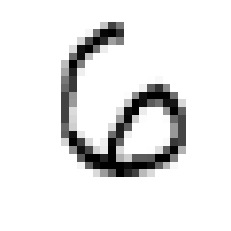

In [12]:
# Visualize the data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [13]:
# Split the data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# Shuffle the data so the folds won't be biased
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
# Apply algorithm
from sklearn.neighbors import KNeighborsClassifier
# First guess: n_neighbors 3, 
knc = KNeighborsClassifier(n_neighbors=3)

knc.fit(X_train, y_train)

KeyboardInterrupt: 

In [16]:
# Test algorithm
knc.predict([some_digit]) #Seems it works well!

array(['6'], dtype=object)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [3, 4, 5]}]
grid_search = GridSearchCV(knc, param_grid, cv=3)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)